In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.spatial import distance
from sklearn.linear_model import LinearRegression
import sklearn 
import scipy
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

In [4]:
os.chdir("/content/drive/MyDrive/Winter_Research")

In [5]:
KS = (32, 6279, 11, 3) 
MT = (29, 6554, 11, 3) 
TX = (34, 6524, 11, 3) 
OH =(19, 5712, 11, 3)
CA = (43, 6569, 11, 3) 

In [6]:
# New Cloud Data
# CA -- 43 images, 72264 pixels, save shape (43, 6569, 11, 3)
# KS -- 32 images, 69071 pixels, save shape (32, 6279, 11, 3)
# MT -- 23 images, 72099 pixels, save shape (23, 6554, 11, 3)
# TX -- 32 images, 71764 pixels, save shape (32, 6524, 11, 3)
# OH -- 12 images, 62827 pixels, save shape (12, 5711, 11, 3)

In [7]:
loadedArr = np.loadtxt("Rois/Roi_1/Cloud_Mask_v2.csv", delimiter=',')
reshape = loadedArr.reshape(43, -1, 5)

In [8]:
reshape.shape

(43, 72264, 5)

In [9]:
lat_lon_bulk = reshape[:, :, 3:5]

In [10]:
lat_lon_bulk.shape


(43, 72264, 2)

In [23]:
x = []
for val in lat_lon_bulk.reshape(-1, 2):
  x.append(val[0]*100000000 + val[1])

In [24]:
len(set(x))

72264

In [14]:
len(set(list(lat_lon_bulk.reshape(-1, 2))))

TypeError: ignored

In [ ]:
imgs = []

In [ ]:
compress_3000 = compress_back / 3000

In [ ]:
compress_3000[0].shape

(6279, 11, 3)

In [ ]:
from PIL import Image
import numpy as np

# data = np.random.random((100,100))

# #Rescale to 0-255 and convert to uint8
# rescaled = (255.0 / data.max() * (data - data.min())).astype(np.uint8)

im = Image.fromarray((255*compress_3000[1]).astype(np.uint8))
# im.save('test.png')

In [ ]:
im

In [ ]:
rescaled = (255.0 / compress_back.max() * (compress_back - compress_back.min())).astype(np.uint8)

In [ ]:
#new_img_rgb = (255*((new_sorted_img - 100)/3500)).astype('uint8')
for i in range(compress_3000.shape[0]):
  print(i)  
  new_img = compress_3000[i]
  print(new_img.shape)
  print(np.max(np.mean(new_img, axis=2)))
  disp = new_img[1000:1050]
  rescaled = (255*disp).astype(np.uint8)
  plt.imshow(rescaled)
  
  im = Image.fromarray(rescaled)
  im.save('CA_straight/cali_img' + str(i) + '.png')
  plt.show()

In [8]:
lat_lon = reshape[0][:, 3:5]  

In [10]:
lat = lat_lon[:, 0].astype(int)
lon = lat_lon[:, 1].astype(int)

In [10]:
np.unique(lon).shape

(7562,)

In [11]:
np.unique(lat).shape

(5900,)

In [12]:
print(lon.shape, lat.shape)

(72264,) (72264,)


In [13]:
coords = {}
for i in range(len(lon)):
  if lon[i] not in coords:
    coords[lon[i]] = []
  coords[lon[i]].append(lat[i])

In [14]:
len(coords)

7562

In [ ]:
coords

In [17]:
num_pixs_around = []
for i in range(len(lon)):
  close = 0
  # print(lon[i], lat[i])
  # print(gen_around(lon[i], lat[i]))
  # break
  for neigh in gen_around_strict(lon[i], lat[i]):
    # print(neigh)
    # break
    # if lookup((lon[i], lat[i])):
    #   print("hmmmmmm")
    #   break
    if lookup(neigh, coords):
      # print("AYYYYYY")
      close += 1
  # print(close)
  # break
  num_pixs_around.append(close)

In [ ]:
num_pixs_around

In [18]:
np.mean(num_pixs_around)

3.593269124321931

In [19]:
neigh_np = np.array(num_pixs_around)

In [20]:
neigh_np[neigh_np < 4].shape

(16826,)

In [21]:
lon_bor = lon[neigh_np < 4]
lat_bor = lat[neigh_np < 4]

In [22]:
coords_bor = {}
for i in range(len(lon_bor)):
  if lon_bor[i] not in coords_bor:
    coords_bor[lon_bor[i]] = []
  coords_bor[lon_bor[i]].append(lat_bor[i])

In [23]:
num_pixs_border = []
for i in range(len(lon_bor)):
  close = 0
  for neigh in gen_around(lon_bor[i], lat_bor[i]):
    if lookup(neigh, coords_bor):
      close += 1
  num_pixs_border.append(close)

In [24]:
np.mean(num_pixs_border)

2.010341138713895

In [28]:
borda = np.array(num_pixs_border)

In [ ]:
borda.shape

(19650,)

In [ ]:
borda[borda == 1].shape

(0,)

In [ ]:
neigh_np[neigh_np == 8].shape

(0,)

In [ ]:
print(neigh_np.shape, lat.shape, lon.shape)

(69071,) (69071,) (69071,)


In [ ]:
five = neigh_np[neigh_np == 5]

In [ ]:
clean_top = [(470)]

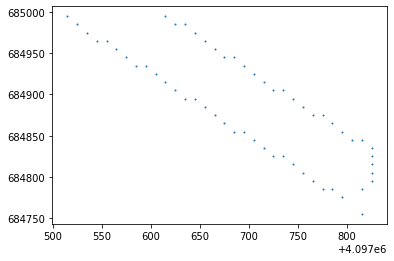

In [41]:
plt.scatter(lon_bor[np.logical_and(lat_bor < 685000, borda == 2)], lat_bor[np.logical_and(lat_bor < 685000, borda == 2)], s=1)
plt.show()

In [46]:
np.max(lon_bor)

4097825

In [48]:
lat_bor[np.where(lon_bor == 4097825)]

array([684795, 684805, 684815, 684825, 684835])

In [49]:
np.where(lon_bor == 4097825)

(array([16821, 16822, 16823, 16824, 16825]),)

In [50]:
print(lon_bor[16825], lat_bor[16825])

4097825 684835


In [ ]:
plt.scatter(lon_bor[np.logical_and(lat_bor < 720000, borda == 2)], lat_bor[np.logical_and(lat_bor < 720000, borda == 2)], s=1)
plt.scatter([4352455], [717555], s=1)
plt.show()

In [ ]:
np.min(lon_bor[np.where(lat_bor == np.min(lat))])

4352465

In [ ]:
(4352465, 717545)
(4352455, 717555)
ERROR: No possible path

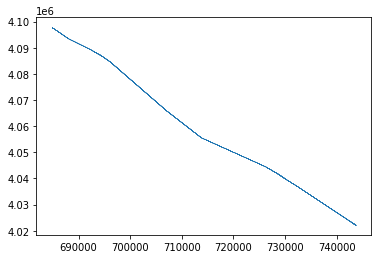

In [11]:
plt.scatter(lon, lat, s=0.0001)
plt.show()

In [ ]:
lon_bor[np.logical_and(lat_bor < 720000, borda == 2)].shape

(512,)

In [ ]:
row_leng = []
for key in coords:
  row_leng.append(len(coords[key]))

In [ ]:
np.mean(row_leng)

81.5478158205431

In [16]:
def gen_around(x, y):
  return [(x, y + 10), (x, y - 10), (x + 10, y), (x - 10, y), (x + 10, y + 10), (x + 10, y - 10), (x - 10, y + 10), (x - 10, y - 10)]

def gen_around_strict(x, y):
  return [(x, y + 10), (x, y - 10), (x + 10, y), (x - 10, y)]

def lookup(c, co):
  if c[0] in co:
    if c[1] in co[c[0]]:
      return True
  return False

In [ ]:
lookup((4360715, 812615), coords)

True

In [ ]:
len(coords_bor)

847

In [ ]:
# For Kansa
# anchor_bt_left = (4352465, 717545)
# anchor_bt_right = (4352535, 717545)
# anchor_tp_left = (4360735, 812745)
# anchor_tp_right = (4360785, 812715)

In [51]:
anchor_bt_left = (4097815, 684755)
anchor_bt_right = (4097825, 684835)
anchor_tp_left = (4022215, 743595)
anchor_tp_right = (4022275, 743745)

In [52]:
path_left = []
path_right = []
def make_paths_left(path_left, point_left):
  # print("Current Point:", point_left)
  for cand in gen_left_cand(point_left):
    if candidate_pt(path_left, cand, coords_bor):
      return cand
  print("ERROR: No possible path")
  assert(False)
  return []

def make_paths_right(path_right, point_right):
  for cand in gen_left_cand(point_right):
    if candidate_pt(path_right, cand, coords_bor):
      return cand
  print("ERROR: No possible path")
  assert(False)
  return []

def candidate_pt(path, point, coords_bor):
  # print("Candidate:", path, point)
  if not lookup(point, coords_bor):
    return False
  if point in path:
    return False
  path.append(point)
  return True

def gen_left_cand(c):
  return [(c[0] - 10, c[1] + 10), (c[0], c[1] + 10), (c[0] + 10, c[1] + 10), (c[0] - 10, c[1]),
          (c[0] + 10, c[1]), (c[0] - 10, c[1] - 10), (c[0], c[1] - 10), (c[0] + 10, c[1] - 10)]

def gen_right_cand(c):
  return [(c[0] + 10, c[1] + 10), (c[0], c[1] + 10), (c[0] - 10, c[1] + 10), (c[0] + 10, c[1]),
          (c[0] - 10, c[1]), (c[0] + 10, c[1] - 10), (c[0], c[1] - 10), (c[0] - 10, c[1] - 10)]

In [53]:
pt_left = anchor_bt_left
while pt_left != anchor_tp_left:
  pt_left = make_paths_left(path_left, pt_left)

pt_right = anchor_bt_right
while pt_right != anchor_tp_right:
  pt_right = make_paths_right(path_right, pt_right)

In [54]:
 print(len(path_left), len(path_right))

7705 7701


In [55]:
print(path_left[0], path_right[0])

(4097805, 684765) (4097815, 684845)


In [ ]:
print(path_left[-1], path_right[-1])

(4360735, 812745) (4360785, 812715)


In [ ]:
print(path_left[50], path_right[50])

(4352445, 718055) (4352515, 718055)


In [ ]:
print(len(path_left), len(path_right))

9520 9517


In [56]:
same = 0
x_diff = []
for i in range(len(path_right)):
  # print(path_left[i][1])
  diff = path_left[i][1] - path_right[i][1]
  x_diff.append(path_right[i][0] - path_left[i][0])
  if diff == 0:
    same += 1

In [57]:
len(path_right) * 6.335

48785.835

In [58]:
np.mean(x_diff) / 10

1.5834307232826905

In [59]:
same

0

In [60]:
print(path_left[45], path_right[45])

(4097355, 685125) (4097365, 685205)


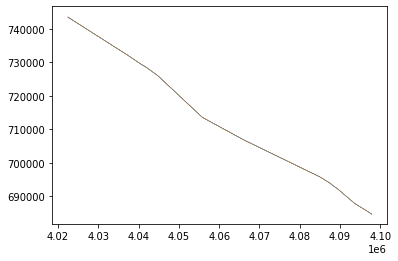

In [61]:
x = []
y = []
x_mid = []
y_mid = []
midpts = []
for i in range(len(path_right)):
  x.append(path_right[i][0])
  x.append(path_left[i][0])
  y.append(path_right[i][1])
  y.append(path_left[i][1])
  x_mid.append((path_right[i][0] + path_left[i][0]) / 2)
  y_mid.append((path_right[i][1] + path_left[i][1]) / 2)
  midpts.append(((path_right[i][0] + path_left[i][0]) / 2, (path_right[i][1] + path_left[i][1]) / 2))
plt.scatter(x, y, s=0.0001)
plt.scatter(x_mid, y_mid, s=0.0001)
plt.show()

In [ ]:
d = []
for i in range(len(midpts) - 1):
  if dist(midpts[i], midpts[i + 1]) != 10:
    print(dist(midpts[i], midpts[i + 1]))
  d.append(dist(midpts[i], midpts[i + 1]))

In [65]:
np.mean(d)

12.699633335325043

In [63]:
def dist(x1, x2):
  return ((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)**(1/2)

In [ ]:
anchor_bt_left

(4352465, 717545)

In [66]:
lookup((4352525, 717925), coords_bor)

False

In [ ]:
path_right

In [67]:
midpts_np = np.array(midpts)

In [68]:
midpts_np.shape

(7701, 2)

In [69]:
midpts[6]

(4097750.0, 684850.0)

In [71]:
np.savetxt("Rois/Roi_1/spine.csv", midpts)

In [70]:
72242 / len(midpts)

9.38085962861966

In [ ]:
69071 - (len(midpts) * 7)

2452